In [63]:
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Permute, Bidirectional, BatchNormalization, Conv1D, LSTM, Dense
from tensorflow.keras.layers import Dropout, GRU, ReLU, ELU, Flatten, MaxPool1D, TimeDistributed
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,LSTM,BatchNormalization,MaxPooling2D,Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Permute, Bidirectional, BatchNormalization, Conv2D, Dense, Dropout, ELU, Flatten, MaxPool2D, TimeDistributed, GRU
from tensorflow.keras.regularizers import L1L2

In [64]:
%cd /Users/yikaiwang/Desktop/project 2

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

/Users/yikaiwang/Desktop/project 2


In [65]:

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [66]:
y_train_valid -= 769
y_test = y_test-769

In [67]:
x_train = X_train_valid[:,:22,:].astype('float32')
x_test = X_test[:,:22,:].astype('float32')
y_train = y_train_valid
y_test = y_test
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [68]:
train_target = keras.utils.to_categorical(y_train, 4)
test_target = keras.utils.to_categorical(y_test, 4)
print(x_train[0].shape)

(22, 1000, 1)


In [69]:
model = Sequential()

model.add(Conv2D(25, kernel_size=(1, 10), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01), input_shape=x_train[0].shape, data_format='channels_last'))
model.add(ELU())
model.add(BatchNormalization())

model.add(Conv2D(50, kernel_size=(21, 1), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
model.add(ELU())
model.add(BatchNormalization())
model.add(MaxPool2D((1, 4)))

model.add(Conv2D(100, kernel_size=(1, 10), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
model.add(ELU())
model.add(BatchNormalization())
model.add(MaxPool2D((1, 4)))
model.add(Dropout(0.5))

model.add(Permute((2, 3, 1)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))#reduce dims from 3 to 2// could use Flatten() instead
model.add(Dropout(0.5))
model.add(Dense(4, kernel_regularizer=L1L2(l1=0, l2=0.01), activation='softmax'))
opt = keras.optimizers.Adam(lr=0.01, epsilon=1e-7, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['acc'])

/Users/yikaiwang/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 22, 991, 25)       275       
                                                                 
 elu_6 (ELU)                 (None, 22, 991, 25)       0         
                                                                 
 batch_normalization_6 (Batc  (None, 22, 991, 25)      100       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 991, 50)        26300     
                                                                 
 elu_7 (ELU)                 (None, 2, 991, 50)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 2, 991, 50)       200       
 hNormalization)                                      

In [28]:
history = model.fit(x_train,train_target,batch_size=50,epochs=100,shuffle=True,validation_split = 0.2)


Epoch 1/100
34/34 [==============================] - 18s 405ms/step - loss: 1.8509 - acc: 0.2400 - val_loss: 1.5132 - val_acc: 0.2459
Epoch 2/100
34/34 [==============================] - 12s 360ms/step - loss: 1.4501 - acc: 0.2494 - val_loss: 1.4269 - val_acc: 0.2530
Epoch 3/100
34/34 [==============================] - 12s 359ms/step - loss: 1.4269 - acc: 0.2630 - val_loss: 1.4127 - val_acc: 0.2695
Epoch 4/100
34/34 [==============================] - 12s 361ms/step - loss: 1.4226 - acc: 0.2606 - val_loss: 1.4344 - val_acc: 0.2553
Epoch 5/100
34/34 [==============================] - 12s 357ms/step - loss: 1.4286 - acc: 0.2683 - val_loss: 1.4186 - val_acc: 0.2884
Epoch 6/100
34/34 [==============================] - 12s 357ms/step - loss: 1.4143 - acc: 0.2819 - val_loss: 1.4199 - val_acc: 0.2671
Epoch 7/100
34/34 [==============================] - 12s 358ms/step - loss: 1.4198 - acc: 0.3126 - val_loss: 1.4584 - val_acc: 0.2766
Epoch 8/100
34/34 [==============================] - 12s 363ms

Epoch 62/100
34/34 [==============================] - 12s 359ms/step - loss: 0.9969 - acc: 0.6241 - val_loss: 1.3985 - val_acc: 0.4586
Epoch 63/100
34/34 [==============================] - 12s 358ms/step - loss: 1.0003 - acc: 0.6141 - val_loss: 1.4361 - val_acc: 0.4468
Epoch 64/100
34/34 [==============================] - 12s 359ms/step - loss: 1.0019 - acc: 0.6217 - val_loss: 1.4530 - val_acc: 0.4752
Epoch 65/100
34/34 [==============================] - 13s 382ms/step - loss: 0.9824 - acc: 0.6306 - val_loss: 1.4095 - val_acc: 0.4468
Epoch 66/100
34/34 [==============================] - 12s 361ms/step - loss: 0.9823 - acc: 0.6383 - val_loss: 1.3917 - val_acc: 0.4681
Epoch 67/100
34/34 [==============================] - 12s 358ms/step - loss: 0.9356 - acc: 0.6602 - val_loss: 1.4169 - val_acc: 0.4870
Epoch 68/100
34/34 [==============================] - 12s 362ms/step - loss: 0.9234 - acc: 0.6578 - val_loss: 1.4597 - val_acc: 0.4704
Epoch 69/100
34/34 [==============================] - 1

In [20]:
import matplotlib.pyplot as plt


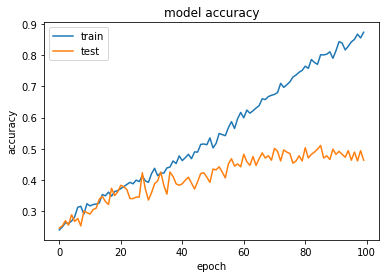

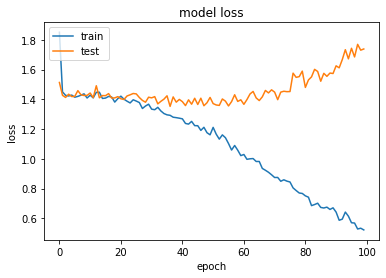

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
score = model.evaluate(x_test, test_target, verbose=0)
print(score[1])

0.5146726965904236


In [70]:
train_scores = []
test_scores = []
time_period = 1000
for sub_idx in range(9):
    print("------------------------------------")
    print("Subject: %d" %(sub_idx))
    X_train_cur = x_train[:, :time_period, :]
    y_train_cur = train_target
    X_test_cur = x_test[:, :time_period, :]
    y_test_cur = test_target

    # single subject dataset
    X_train_cur = X_train_cur[np.where(person_train_valid == sub_idx)[0]]
    y_train_cur = y_train_cur[np.where(person_train_valid == sub_idx)[0]]
    X_test_cur = X_test_cur[np.where(person_test == sub_idx)[0]]
    y_test_cur = y_test_cur[np.where(person_test == sub_idx)[0]]


    history1 = model.fit(X_train_cur,y_train_cur,batch_size=38,epochs=38,shuffle=True,validation_data=(X_test_cur, y_test_cur))

    train_score = model.evaluate(X_train_cur, y_train_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)
    train_scores.append(train_score[1]*100)
    test_scores.append(test_score[1]*100)


------------------------------------
Subject: 0
Epoch 1/38
7/7 [==============================] - 6s 408ms/step - loss: 2.5279 - acc: 0.2869 - val_loss: 2.1641 - val_acc: 0.2800
Epoch 2/38
7/7 [==============================] - 2s 269ms/step - loss: 2.0493 - acc: 0.2785 - val_loss: 1.7537 - val_acc: 0.2400
Epoch 3/38
7/7 [==============================] - 2s 261ms/step - loss: 1.6905 - acc: 0.2321 - val_loss: 1.5860 - val_acc: 0.1600
Epoch 4/38
7/7 [==============================] - 2s 259ms/step - loss: 1.6012 - acc: 0.1941 - val_loss: 1.5394 - val_acc: 0.2800
Epoch 5/38
7/7 [==============================] - 2s 258ms/step - loss: 1.5167 - acc: 0.3249 - val_loss: 1.5124 - val_acc: 0.2400
Epoch 6/38
7/7 [==============================] - 2s 255ms/step - loss: 1.5170 - acc: 0.2785 - val_loss: 1.5047 - val_acc: 0.2600
Epoch 7/38
7/7 [==============================] - 2s 258ms/step - loss: 1.5006 - acc: 0.2827 - val_loss: 1.4956 - val_acc: 0.2400
Epoch 8/38
7/7 [==========================

Epoch 24/38
7/7 [==============================] - 2s 264ms/step - loss: 1.4221 - acc: 0.2712 - val_loss: 1.4262 - val_acc: 0.2400
Epoch 25/38
7/7 [==============================] - 2s 257ms/step - loss: 1.4048 - acc: 0.2669 - val_loss: 1.3873 - val_acc: 0.3000
Epoch 26/38
7/7 [==============================] - 2s 256ms/step - loss: 1.3927 - acc: 0.2797 - val_loss: 1.3846 - val_acc: 0.3200
Epoch 27/38
7/7 [==============================] - 2s 258ms/step - loss: 1.4131 - acc: 0.2966 - val_loss: 1.4224 - val_acc: 0.3200
Epoch 28/38
7/7 [==============================] - 2s 254ms/step - loss: 1.4022 - acc: 0.2966 - val_loss: 1.3764 - val_acc: 0.3600
Epoch 29/38
7/7 [==============================] - 2s 264ms/step - loss: 1.3959 - acc: 0.3220 - val_loss: 1.3726 - val_acc: 0.3600
Epoch 30/38
7/7 [==============================] - 2s 256ms/step - loss: 1.3776 - acc: 0.3644 - val_loss: 1.3505 - val_acc: 0.3200
Epoch 31/38
7/7 [==============================] - 2s 260ms/step - loss: 1.3704 - a

7/7 [==============================] - 2s 250ms/step - loss: 1.4257 - acc: 0.4786 - val_loss: 1.5834 - val_acc: 0.3400
Epoch 8/38
7/7 [==============================] - 2s 250ms/step - loss: 1.4199 - acc: 0.4744 - val_loss: 1.5884 - val_acc: 0.3800
Epoch 9/38
7/7 [==============================] - 2s 252ms/step - loss: 1.3535 - acc: 0.4957 - val_loss: 1.6105 - val_acc: 0.3800
Epoch 10/38
7/7 [==============================] - 2s 263ms/step - loss: 1.3565 - acc: 0.4744 - val_loss: 1.6619 - val_acc: 0.3600
Epoch 11/38
7/7 [==============================] - 2s 254ms/step - loss: 1.2912 - acc: 0.5256 - val_loss: 1.6416 - val_acc: 0.3400
Epoch 12/38
7/7 [==============================] - 2s 254ms/step - loss: 1.4073 - acc: 0.4359 - val_loss: 1.7975 - val_acc: 0.3000
Epoch 13/38
7/7 [==============================] - 2s 253ms/step - loss: 1.4433 - acc: 0.4017 - val_loss: 1.6679 - val_acc: 0.3000
Epoch 14/38
7/7 [==============================] - 2s 252ms/step - loss: 1.4840 - acc: 0.4359 - v

7/7 [==============================] - 2s 254ms/step - loss: 0.8829 - acc: 0.7872 - val_loss: 1.8828 - val_acc: 0.3830
Epoch 31/38
7/7 [==============================] - 2s 251ms/step - loss: 0.8743 - acc: 0.8000 - val_loss: 1.7508 - val_acc: 0.4681
Epoch 32/38
7/7 [==============================] - 2s 252ms/step - loss: 0.7796 - acc: 0.8383 - val_loss: 1.7586 - val_acc: 0.5532
Epoch 33/38
7/7 [==============================] - 2s 255ms/step - loss: 0.7465 - acc: 0.8681 - val_loss: 1.7552 - val_acc: 0.4894
Epoch 34/38
7/7 [==============================] - 2s 252ms/step - loss: 0.7149 - acc: 0.8638 - val_loss: 1.9132 - val_acc: 0.4468
Epoch 35/38
7/7 [==============================] - 2s 253ms/step - loss: 0.7291 - acc: 0.8723 - val_loss: 1.8324 - val_acc: 0.5319
Epoch 36/38
7/7 [==============================] - 2s 250ms/step - loss: 0.6297 - acc: 0.8936 - val_loss: 1.6540 - val_acc: 0.5319
Epoch 37/38
7/7 [==============================] - 2s 252ms/step - loss: 0.5796 - acc: 0.9362 -

7/7 [==============================] - 2s 257ms/step - loss: 0.7903 - acc: 0.8697 - val_loss: 1.6157 - val_acc: 0.5200
Epoch 14/38
7/7 [==============================] - 2s 257ms/step - loss: 0.7586 - acc: 0.8782 - val_loss: 1.5350 - val_acc: 0.5400
Epoch 15/38
7/7 [==============================] - 2s 256ms/step - loss: 0.7617 - acc: 0.8613 - val_loss: 1.5765 - val_acc: 0.5600
Epoch 16/38
7/7 [==============================] - 2s 257ms/step - loss: 0.6933 - acc: 0.8950 - val_loss: 1.6397 - val_acc: 0.5200
Epoch 17/38
7/7 [==============================] - 2s 258ms/step - loss: 0.7398 - acc: 0.8613 - val_loss: 1.8459 - val_acc: 0.4800
Epoch 18/38
7/7 [==============================] - 2s 256ms/step - loss: 0.7696 - acc: 0.8613 - val_loss: 1.7716 - val_acc: 0.4000
Epoch 19/38
7/7 [==============================] - 2s 256ms/step - loss: 0.6981 - acc: 0.8950 - val_loss: 1.9587 - val_acc: 0.4600
Epoch 20/38
7/7 [==============================] - 2s 256ms/step - loss: 0.7058 - acc: 0.8739 -

7/7 [==============================] - 2s 247ms/step - loss: 0.6132 - acc: 0.9267 - val_loss: 2.0867 - val_acc: 0.3600
Epoch 37/38
7/7 [==============================] - 2s 253ms/step - loss: 0.6068 - acc: 0.9353 - val_loss: 2.0591 - val_acc: 0.4000
Epoch 38/38
2/2 [==============================] - 0s 55ms/step - loss: 2.2447 - acc: 0.4400
------------------------------------
Subject: 8
Epoch 1/38
7/7 [==============================] - 2s 251ms/step - loss: 2.6193 - acc: 0.3074 - val_loss: 2.6074 - val_acc: 0.2128
Epoch 2/38
7/7 [==============================] - 2s 247ms/step - loss: 2.2475 - acc: 0.3983 - val_loss: 2.4976 - val_acc: 0.2340
Epoch 3/38
7/7 [==============================] - 2s 249ms/step - loss: 1.8638 - acc: 0.4329 - val_loss: 2.0597 - val_acc: 0.3191
Epoch 4/38
7/7 [==============================] - 2s 250ms/step - loss: 1.6620 - acc: 0.4242 - val_loss: 1.8902 - val_acc: 0.3617
Epoch 5/38
7/7 [==============================] - 2s 249ms/step - loss: 1.4468 - acc: 0.4

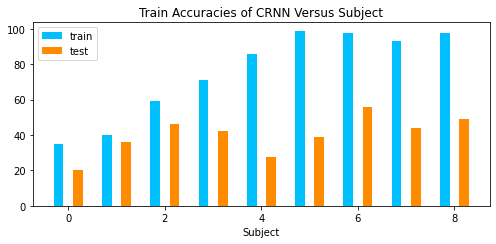

Train Accuracy:
[35.0210964679718, 39.83050882816315, 59.32203531265259, 71.36752009391785, 85.95744967460632, 98.72881174087524, 97.89915680885315, 93.1034505367279, 97.40259647369385]
Test Accuracy
[20.000000298023224, 36.000001430511475, 46.00000083446503, 41.999998688697815, 27.659574151039124, 38.77550959587097, 56.00000023841858, 43.99999976158142, 48.93617033958435]


In [71]:
plt.figure()
x_aixs = np.arange(9)
plt.bar(x_aixs-0.2, train_scores, color = 'deepskyblue', label='train', width = 0.2)
plt.bar(x_aixs+0.2, test_scores, color = 'darkorange' ,label='test',width = 0.2)

plt.xlabel('Subject')
plt.legend()
plt.title("Train Accuracies of CRNN Versus Subject")
plt.show()

print('Train Accuracy:')
print(train_scores)
print('Test Accuracy')
print(test_scores)